# ***SVM***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Exploratory Data Analysis

**Data Exploration**

In [3]:
# Load the Mushroom dataset (assuming it's in CSV format)
df = pd.read_csv('/content/sample_data/mushroom.csv')

# Display basic info about the dataset
df.info()

# Check for any missing values and basic stats
df.describe()

# View the first few rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


**Feature Distributions**

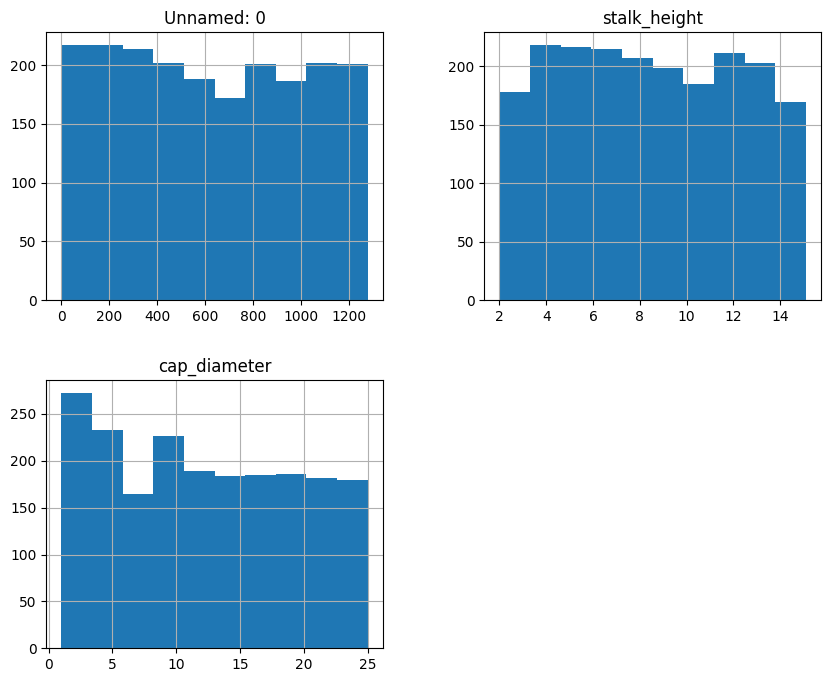

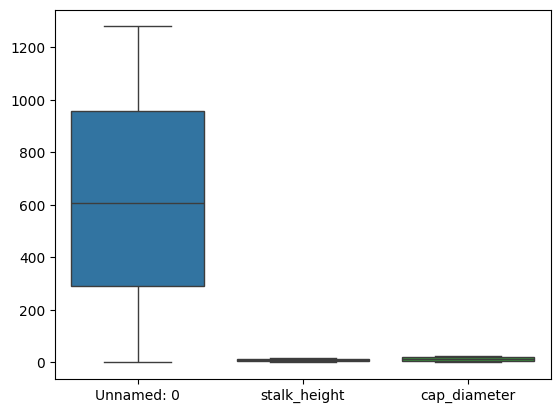

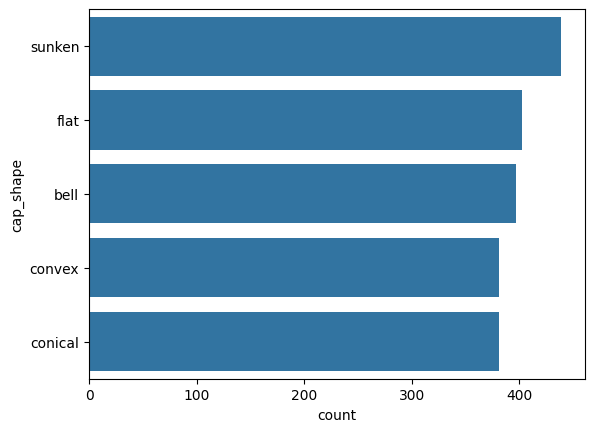

In [5]:
# Plot histograms for numerical features (if any)
df.hist(figsize=(10, 8))
plt.show()

# Box plot for numerical features (if present)
sns.boxplot(data=df)
plt.show()

# Density plots for distribution of features
sns.countplot(df['cap_shape'])
plt.show()

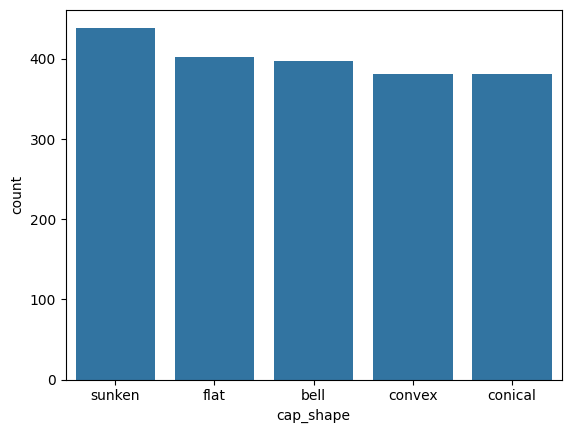

In [6]:
# Visualize the distribution of a categorical feature (e.g., cap shape)
sns.countplot(x='cap_shape', data=df)
plt.show()

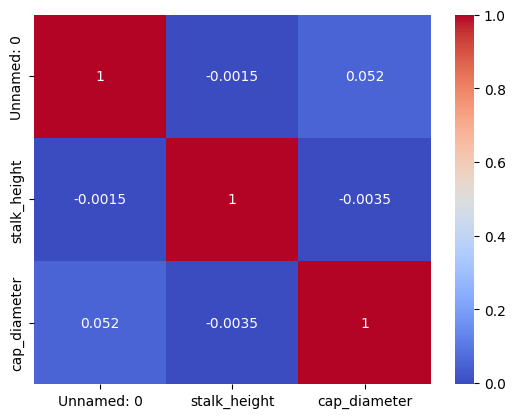

In [10]:
# Plot correlation matrix for numerical features (if any)
# Convert selected columns to numeric using pd.to_numeric
numeric_df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
numeric_df = numeric_df.dropna(axis=1, how='all')

#Calculate corerelations on the numeric DataFrame
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing

In [11]:
# Encode all categorical columns
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)

# Check the first few rows after encoding
df_encoded.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


In [12]:
# Define the target and features
X = df_encoded.drop('class', axis=1)  # Assuming 'class' is the target column
y = df_encoded['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Visualization

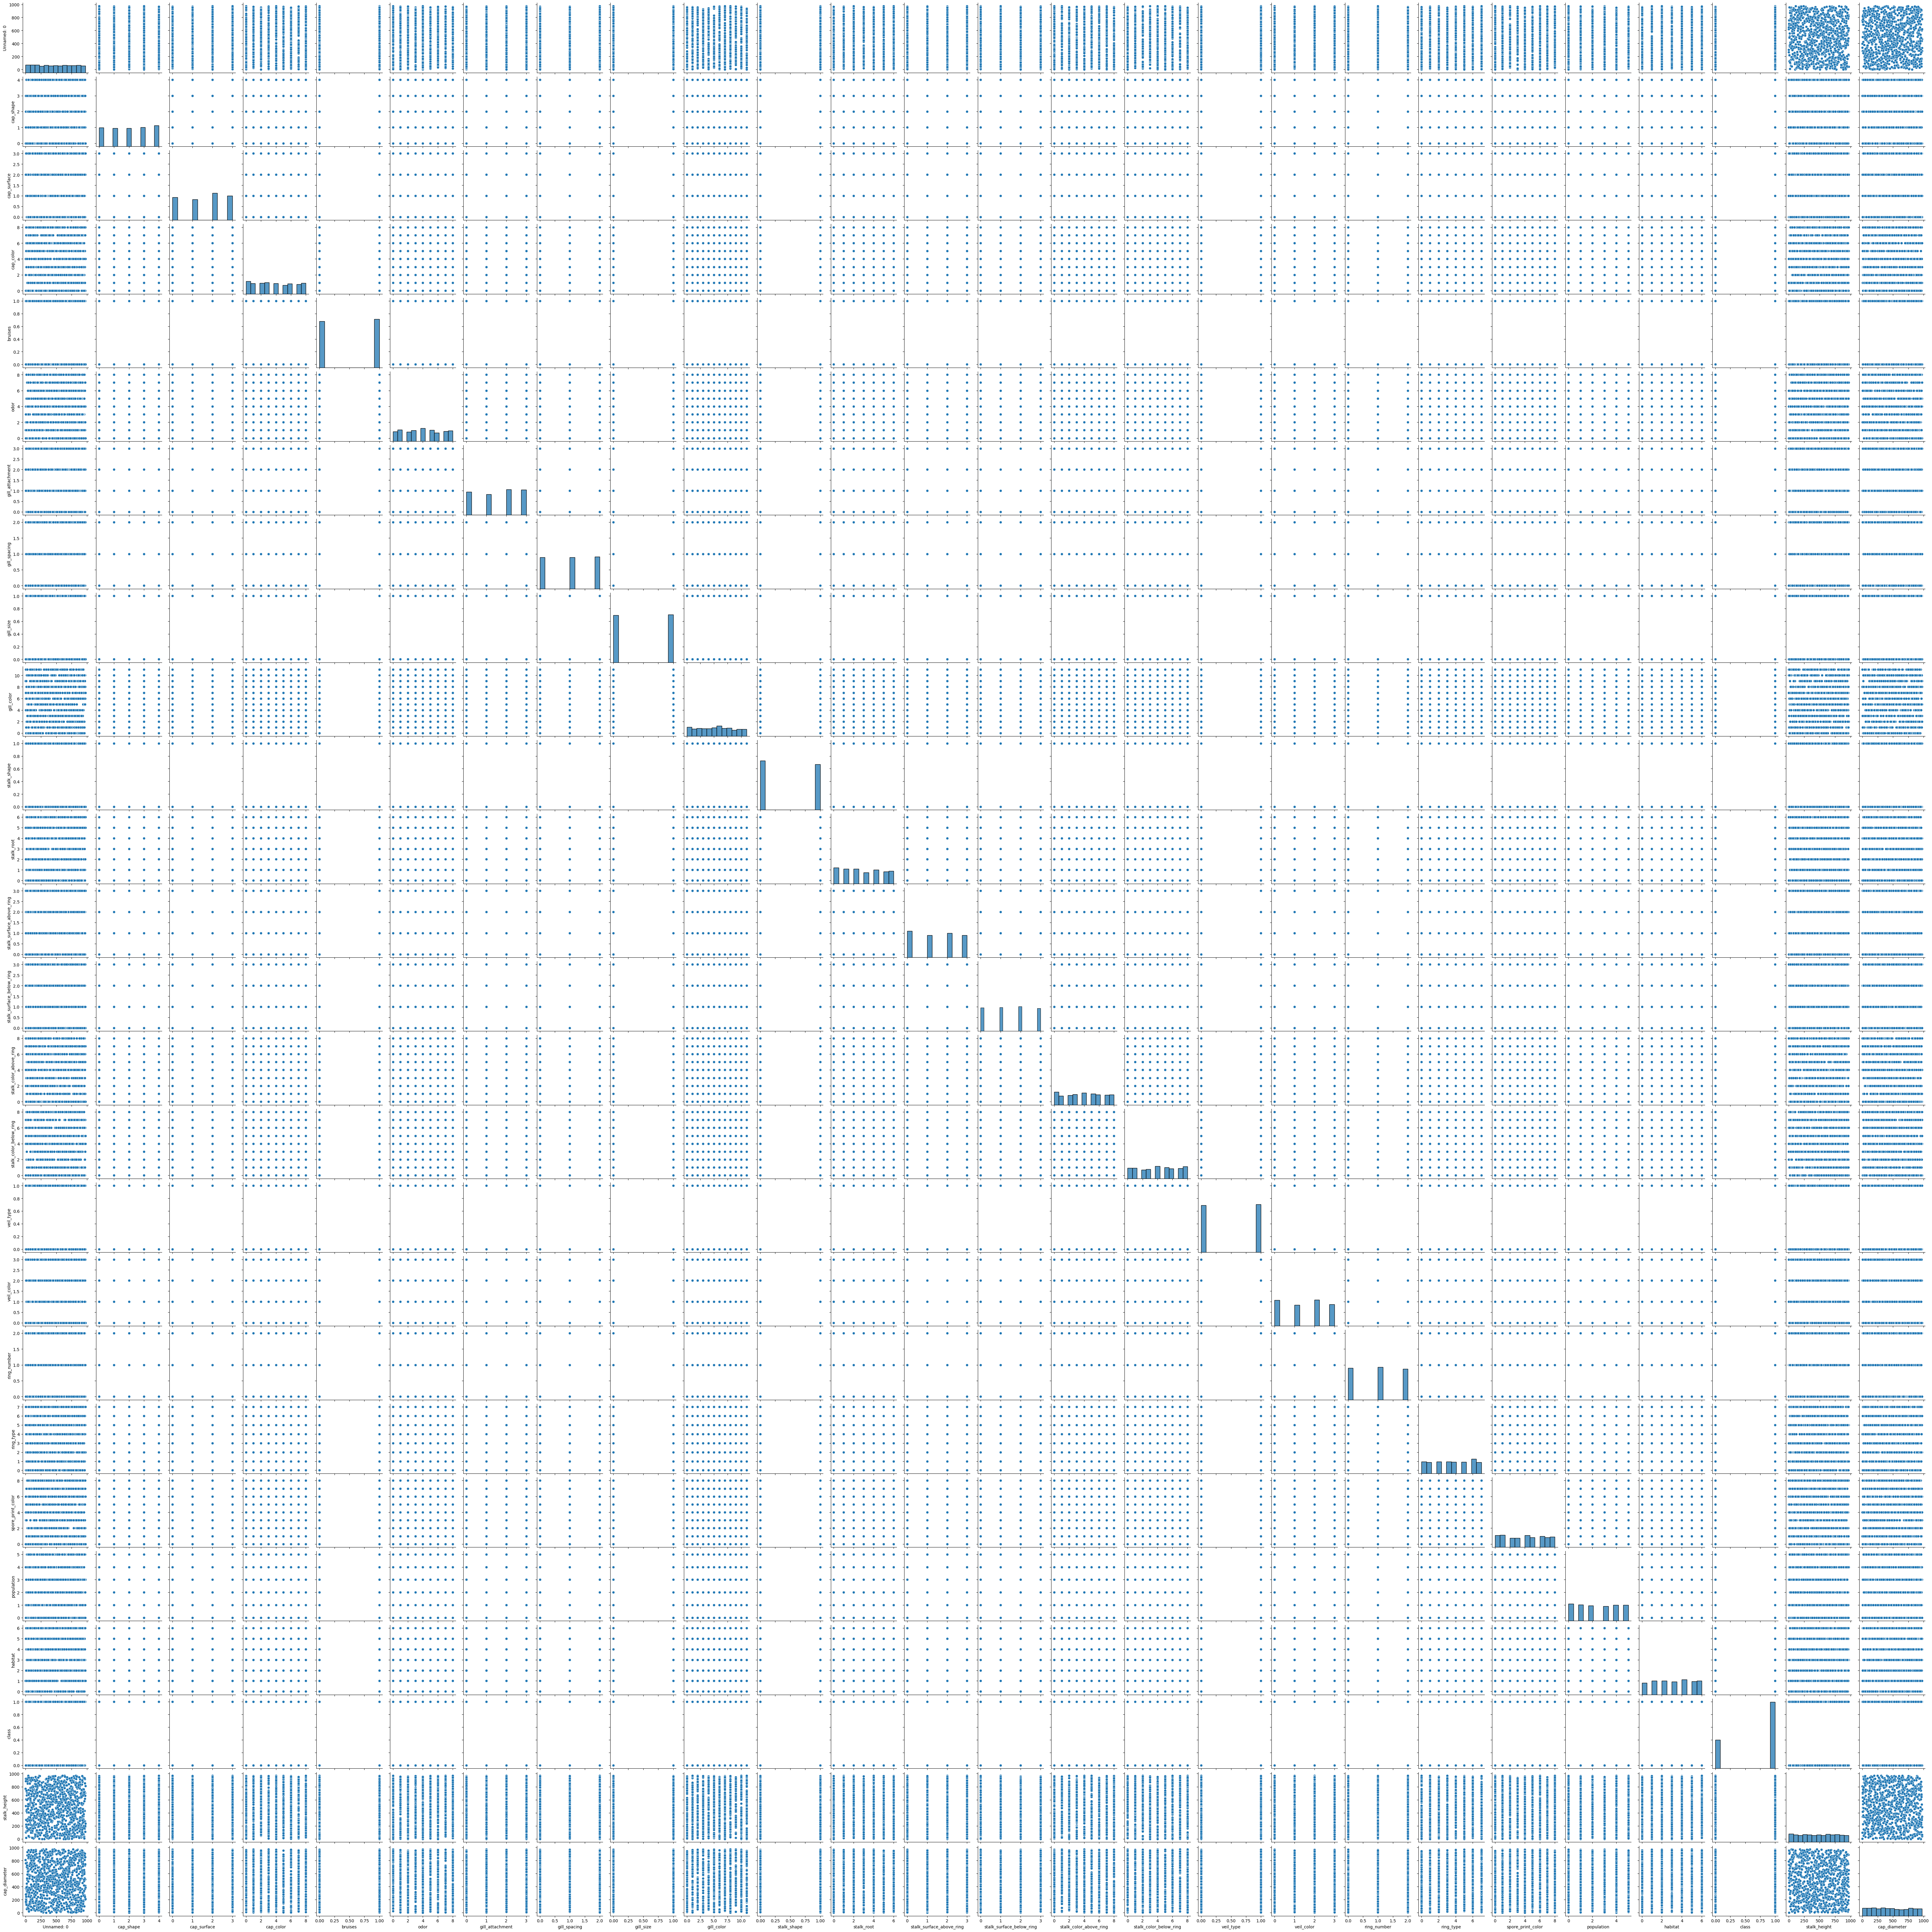

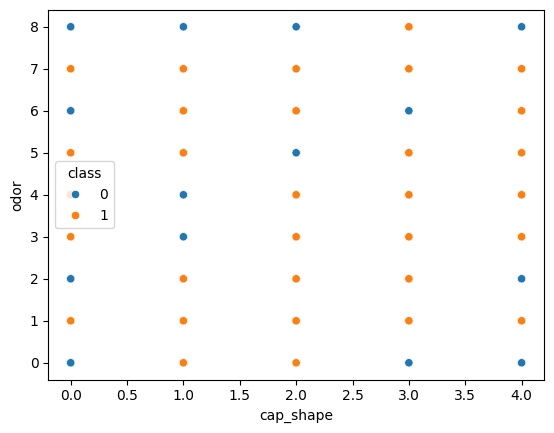

In [15]:
# Use pairplot to visualize relationships between features
sns.pairplot(df_encoded)
plt.show()

# Example scatter plot for two features
sns.scatterplot(x='cap_shape', y='odor', hue='class', data=df_encoded)
plt.show()

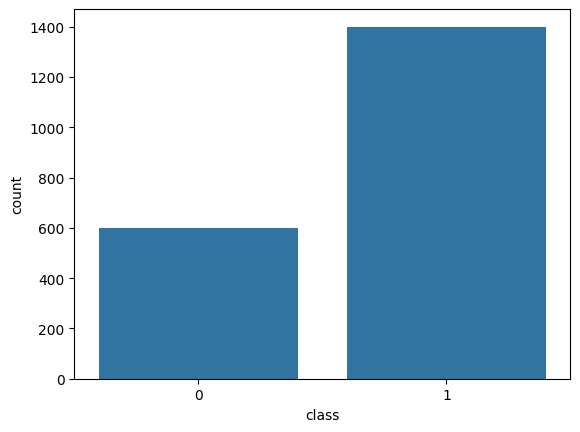

In [16]:
# Visualize the class distribution (e.g., poisonous vs edible)
sns.countplot(x='class', data=df_encoded)
plt.show()

# SVM Implementation

In [18]:
# Initialize the SVM classifier
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# Predict the labels for the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Visualization of SVM Results

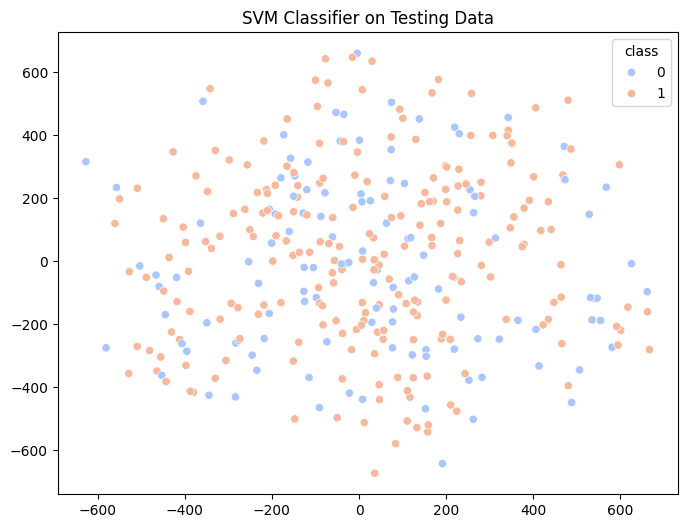

In [24]:
# Reduce to 2D using PCA for visualization (if more than 2 features)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Plot decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_2d[:, 0], y=X_test_2d[:, 1], hue=y_test, palette='coolwarm')
plt.title("SVM Classifier on Testing Data")
plt.show()

# Parameter Tuning and Optimization

In [27]:
# SVM with RBF kernel and tuned C parameter
svm_rbf = SVC(kernel='rbf', C=10)
svm_rbf.fit(X_train, y_train)

# Evaluate performance
y_pred_rbf = svm_rbf.predict(X_test)
print(f"Accuracy with RBF kernel: {accuracy_score(y_test, y_pred_rbf)}")

Accuracy with RBF kernel: 0.6675


# Comparison and Analysis

In [32]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print(f"Accuracy with Linear kernel: {accuracy_score(y_test, y_pred_linear)}")

# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print(f"Accuracy with Polynomial kernel: {accuracy_score(y_test, y_pred_poly)}")

Accuracy with Linear kernel: 0.6675
Accuracy with Polynomial kernel: 0.6675
